In [2]:
from ripser import ripser
from persim import plot_diagrams
from numpy import sin,cos, dot
import numpy as np
from numpy import pi,cos,sin
import matplotlib.pyplot as plt
import random
import math

In [3]:
def graph_continuous(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    x_points = []
    y_points = []
    colors = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i]) 
        colors.append(color)
        x_points.append(X[i])
        y_points.append(Y[i])

        
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors, s = .1)
    plt.show()

def graph_OneInput(image_function, x, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x)     

    else:
        X = np.linspace(-x,x,n_samples)
        
    x_points = []
    y_points =[]
    colors = []
    for i in range(n_samples):
        x_points.append(X[i])
        y_points.append(image_function(X[i]))

    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, s = .1)
    plt.show()
    
def graph_TwoInput(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    x_points = []
    y_points = []
    colors = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i]) 
        colors.append(color)
        x_points.append(X[i])
        y_points.append(Y[i])

        
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors, s = .1)
    plt.show()
    
    


In [4]:
def angelica(x):
    if 0 <= x%4 <= 2:
        f = x%4
    elif 2< x%4 <= 3:
        f = 2
    else:
        f = -2 * (x%4) + 8
    return f

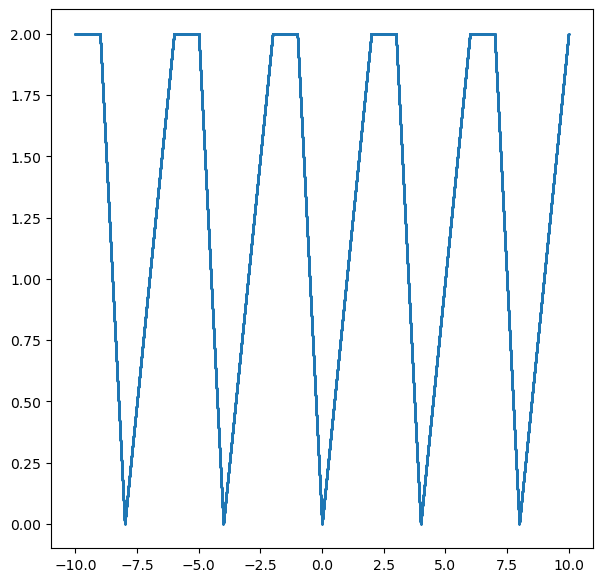

In [4]:
graph_OneInput(angelica, 10,10)

In [5]:
def angelica2(x):
    if 0 <= x%6 <= 0.5:
        f = 6 * (x%6)
    elif 0.5< x%6 <= 2:
        f = 3
    else:
        f = -(3/4) * (x%6) + 4.5
    return f

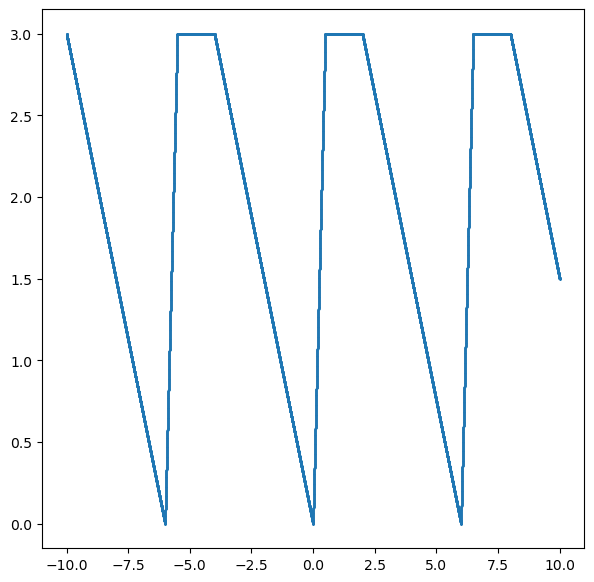

In [6]:
graph_OneInput(angelica2, 10,10)

In [244]:
def mult12(x,y):
    return angelica(x) * angelica2(y)

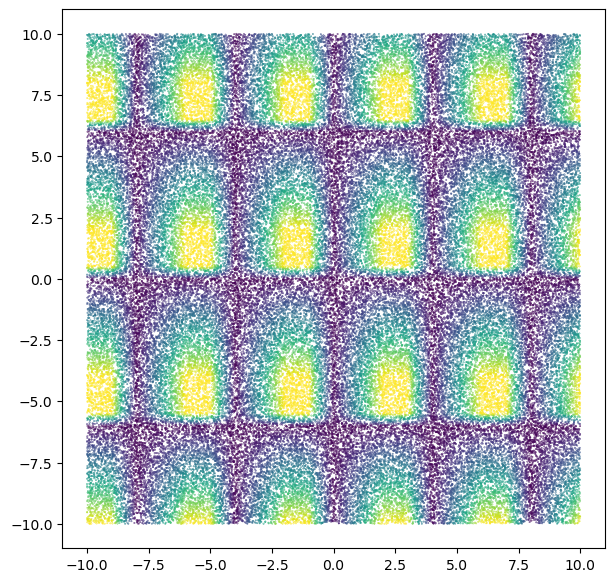

In [245]:
graph_TwoInput(mult12, 10,10)

In [8]:
def view_window_continuous(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)
            
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels)):
        color = image_function(pixels[i][0],pixels[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()

def get_pixels(num_pixels, window_size):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels


def get_colors(pixels, image_function):
    colors = []
    for pixel in pixels:
        colors.append(image_function(pixel[0],pixel[1]))
    return colors  

def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_isom(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(2 * pi * np.random.random(n_isos)) # sampling from (0, 2pi)

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors

def matrix_of_images(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([new_colors(pixels, i, image_function)])
    M = np.concatenate(vectors, axis=0 )
    return M

def p_hom(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff)
    return output
    
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (12, 6))
    plot_diagrams(dgms)
    
def pipeline(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

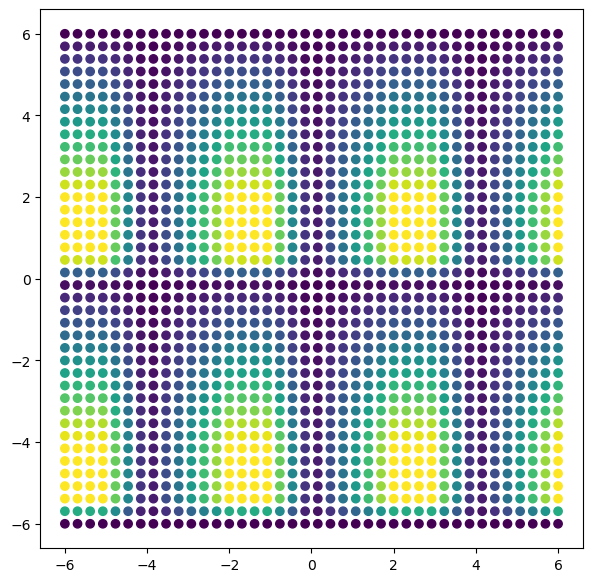

In [247]:
view_window_continuous(mult12,40,12)

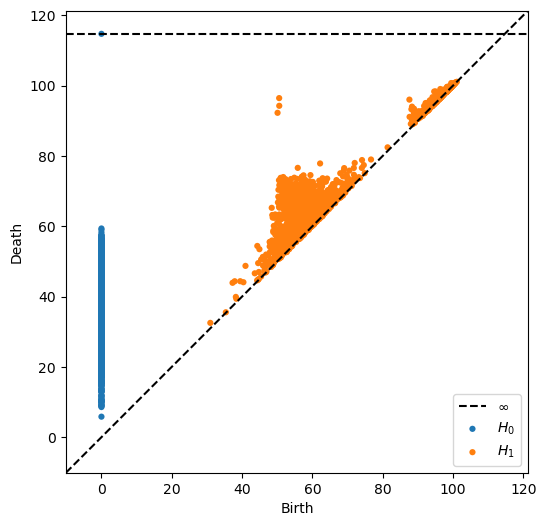

In [248]:
#Z2
output = pipeline(image_function=mult12, num_pixels=40, window_size=12, n_isos=2000, x_translate=100, y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

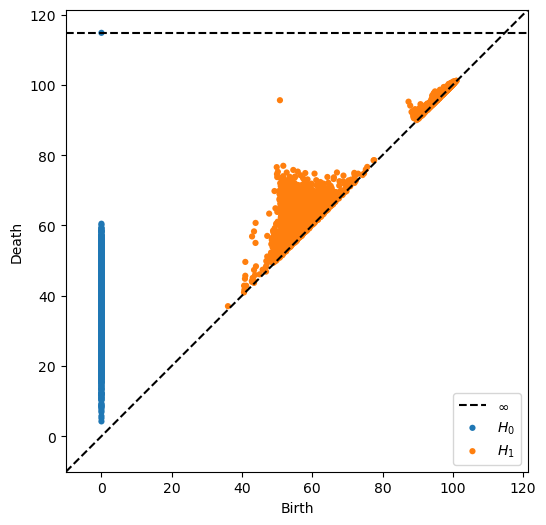

In [125]:
#Z3
output = pipeline(image_function=mult12, num_pixels=40, window_size=12, n_isos=2000, x_translate=100, y_translate=100, maxdim=1, coeff=3)
plot_dgms(output)

In [5]:
def angelica3(x):
    if 0 <= x%12 <= 8:
        f = .25 * (x % 12) + 1
    elif 8 <= x%12 <= 9:
        f = -2 * (x%12) + 18 +1
    else:
        f = 1
    return f

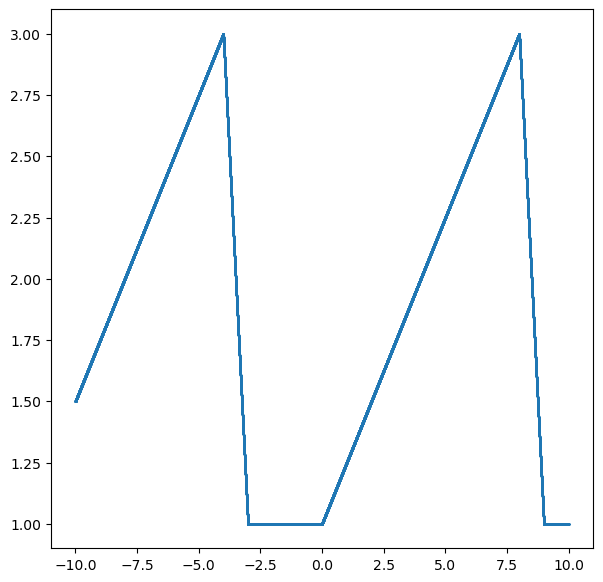

In [9]:
graph_OneInput(angelica3, 10,10)

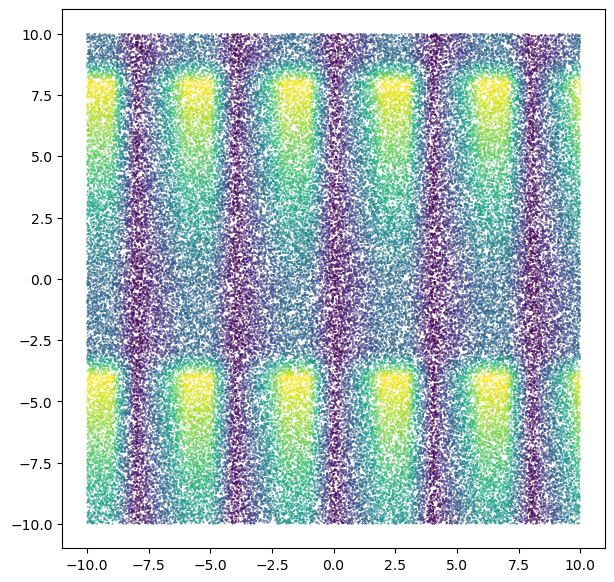

In [148]:
def mult13(x,y):
    return angelica(x) * angelica3(y)
graph_continuous(mult13,10,10)

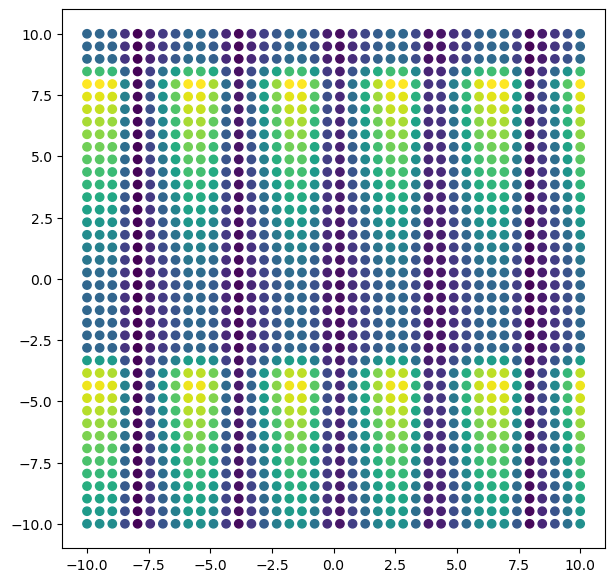

In [151]:
view_window_continuous(mult13,40,20)

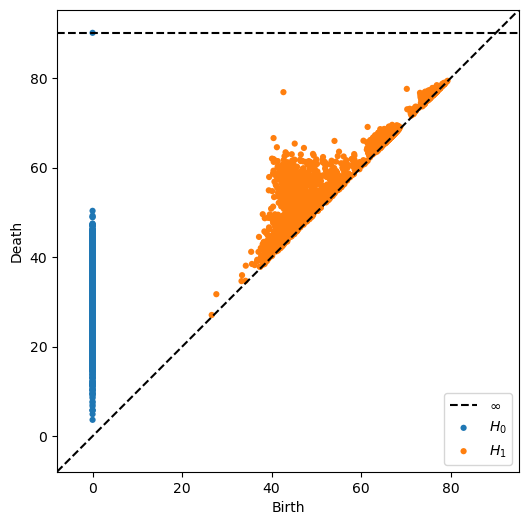

In [154]:
#Z2
output = pipeline(image_function=mult13, num_pixels=40, window_size=20, n_isos=2000, x_translate=100, y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

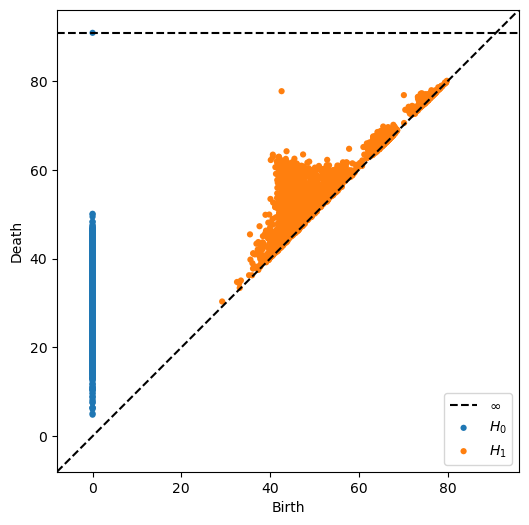

In [153]:
#Z3
output = pipeline(image_function=mult13, num_pixels=40, window_size=20, n_isos=2000, x_translate=100, y_translate=100, maxdim=1, coeff=3)
plot_dgms(output)

In [158]:
def get_pixels_custom(num_pixels, window_size_x, window_size_y, window_center_x, window_center_y):
    sample_x = list(np.linspace(-window_size_x/2, window_size_x/2, num_pixels) + window_center_x)
    sample_y = list(np.linspace(-window_size_y/2, window_size_y/2, num_pixels) + window_center_y)
    pixels = []
    for i in range(len(sample_x)):
        for j in range(len(sample_y)):
            pixels.append((sample_x[i],sample_y[j]))     
    return pixels

In [163]:
def view_window_custom(image_function, num_pixels, window_size_x, window_size_y, window_center_x, window_center_y):
    
    pixels = get_pixels_custom(num_pixels, window_size_x, window_size_y, window_center_x, window_center_y)
            
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels)):
        color = image_function(pixels[i][0],pixels[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()

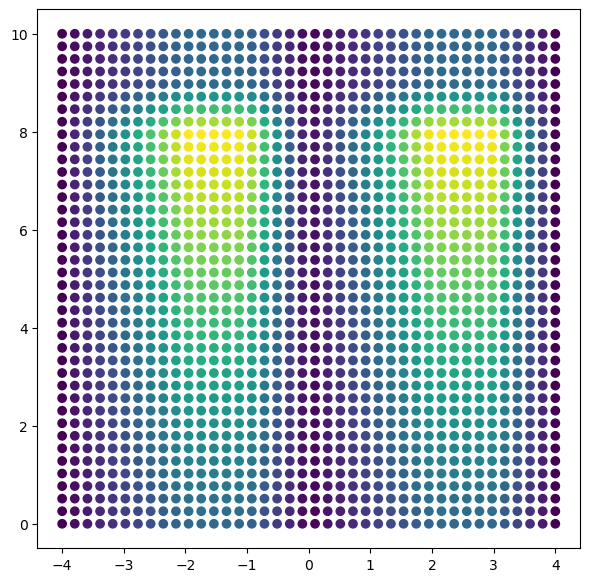

In [165]:
view_window_custom(image_function = mult13, num_pixels = 40, window_size_x = 8, window_size_y = 10, window_center_x = 0, window_center_y = 5)

In [196]:
def p_hom_perm(M, maxdim, coeff, n_perm):
    output = ripser(M, maxdim = maxdim, coeff = coeff, n_perm=n_perm)
    return output

def pipeline_custom(image_function, num_pixels, window_size_x, window_size_y, window_center_x, window_center_y, n_isos, x_translate, y_translate, maxdim, coeff, n_perm):
    pixels = get_pixels_custom(num_pixels, window_size_x, window_size_y, window_center_x, window_center_y)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom_perm(M, maxdim, coeff, n_perm)
    return output

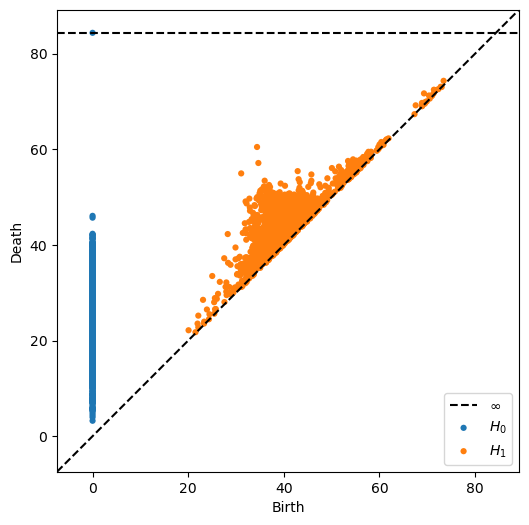

In [168]:
#Z2
output = pipeline_custom(image_function=mult13, num_pixels=40, window_size_x = 8, window_size_y = 10, window_center_x = 0, window_center_y = 5, n_isos=2000, x_translate=100, y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

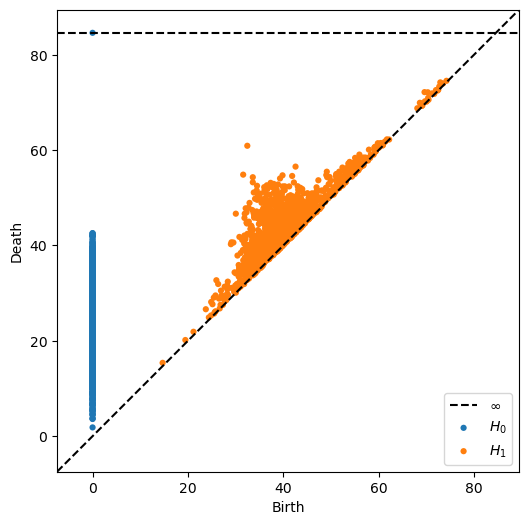

In [169]:
#Z3
output = pipeline_custom(image_function=mult13, num_pixels=40, window_size_x = 8, window_size_y = 10, window_center_x = 0, window_center_y = 5, n_isos=2000, x_translate=100, y_translate=100, maxdim=1, coeff=3)
plot_dgms(output)

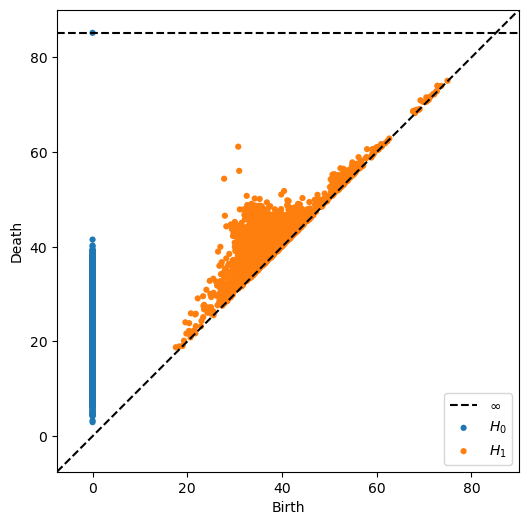

In [170]:
#Z2
output = pipeline_custom(image_function=mult13, num_pixels=40, window_size_x = 8, window_size_y = 10, window_center_x = 0, window_center_y = 5, n_isos=3000, x_translate=100, y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

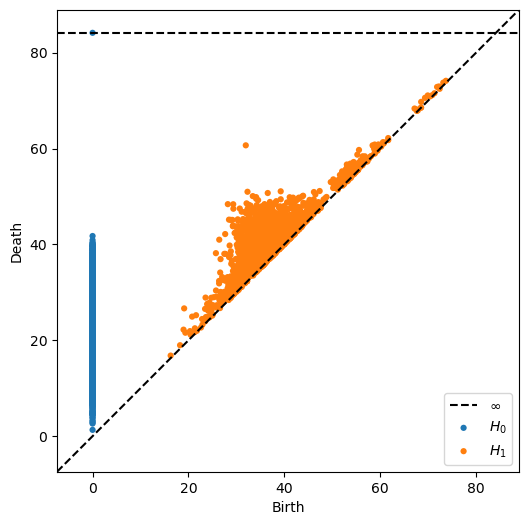

In [171]:
#Z3
output = pipeline_custom(image_function=mult13, num_pixels=40, window_size_x = 8, window_size_y = 10, window_center_x = 0, window_center_y = 5, n_isos=3000, x_translate=100, y_translate=100, maxdim=1, coeff=3)
plot_dgms(output)

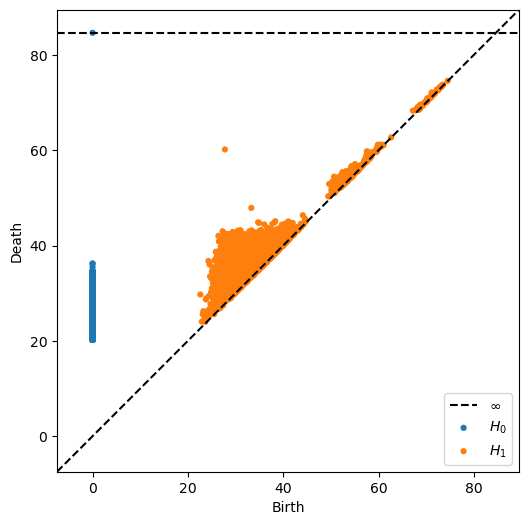

In [179]:
#Z3
output = pipeline_custom(image_function=mult13, num_pixels=40, window_size_x = 8, window_size_y = 10, window_center_x = 0, window_center_y = 5, n_isos=10000, x_translate=100, y_translate=100, maxdim=1, coeff=3, n_perm = 5000)
plot_dgms(output)

**seems to think this is C2**

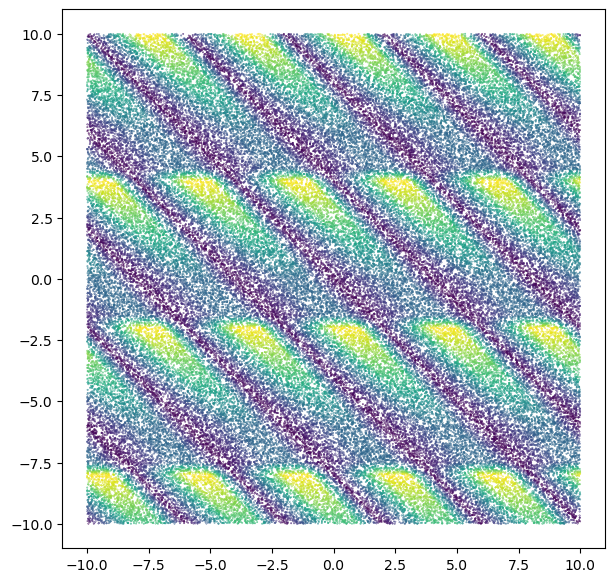

In [212]:
def mult13coef(x,y):
    return angelica(x+y) * angelica3(2*y) 
graph_continuous(mult13coef,10,10)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


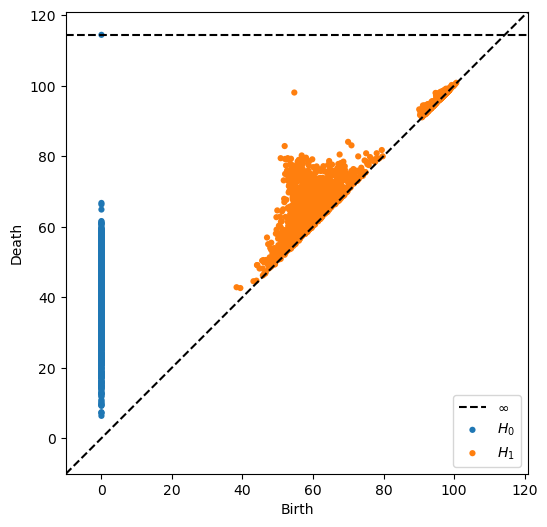

In [211]:
#Z3
output = pipeline(image_function=mult13coef, num_pixels=50, window_size= 15, n_isos=2000, x_translate=100, y_translate=100, maxdim=1, coeff=3)
plot_dgms(output)

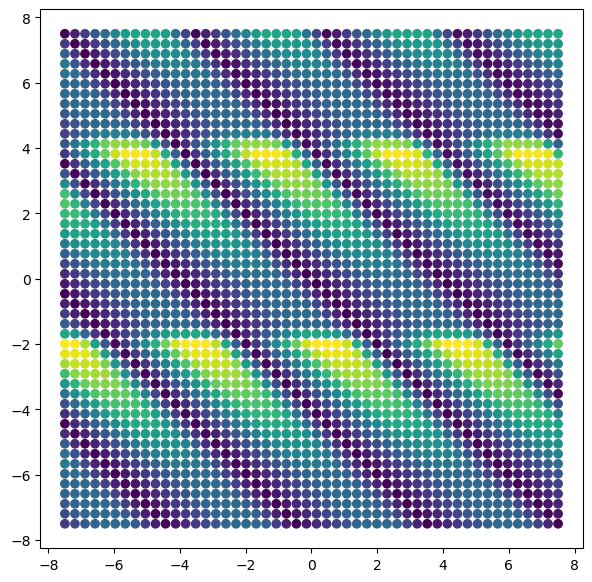

In [200]:
view_window_continuous(mult13coef,50,15)

In [11]:
def mult13coef(x,y):
    return angelica(x-y) * angelica3(x+y)- 3*angelica3(x)
graph_continuous(mult13coef,20,20)

NameError: name 'graph_continuous' is not defined

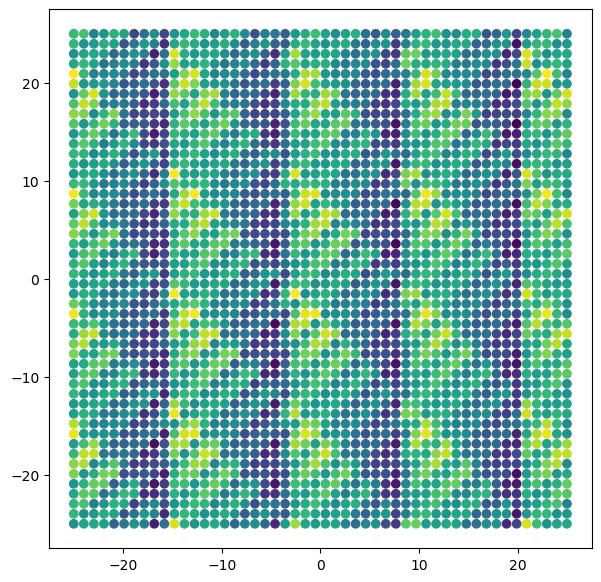

In [250]:
view_window_continuous(image_function=mult13coef, num_pixels=50, window_size=50)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


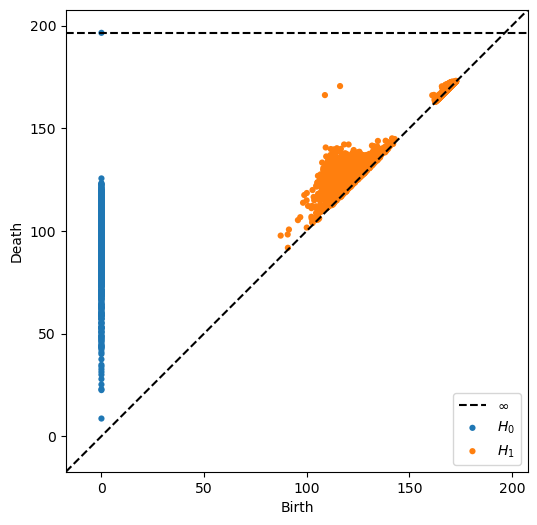

In [251]:
#Z2
output = pipeline(image_function=mult13coef, num_pixels=50, window_size= 50, n_isos=2000, x_translate=1000, y_translate=1000, maxdim=1, coeff=2)
plot_dgms(output)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


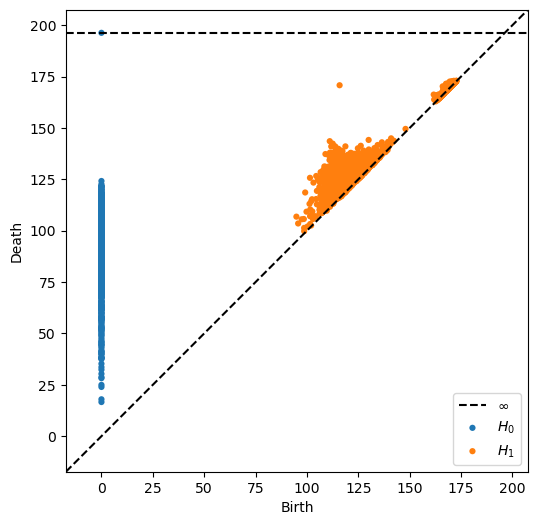

In [252]:
#Z3
output = pipeline(image_function=mult13coef, num_pixels=50, window_size= 50, n_isos=2000, x_translate=1000, y_translate=1000, maxdim=1, coeff=3)
plot_dgms(output)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


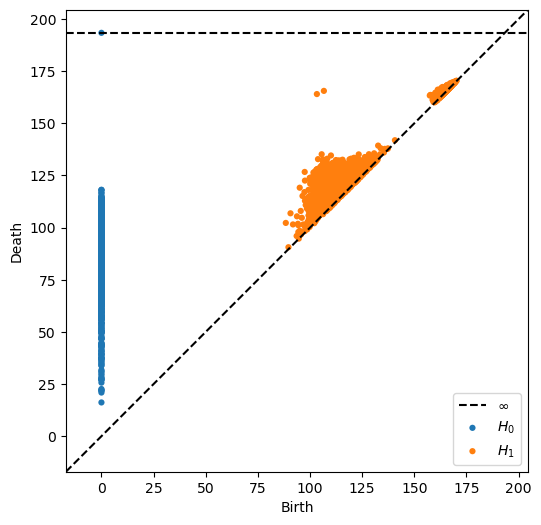

In [237]:
#Z2
output = pipeline(image_function=mult13coef, num_pixels=50, window_size= 30, n_isos=2000, x_translate=1000, y_translate=1000, maxdim=1, coeff=2)
plot_dgms(output)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


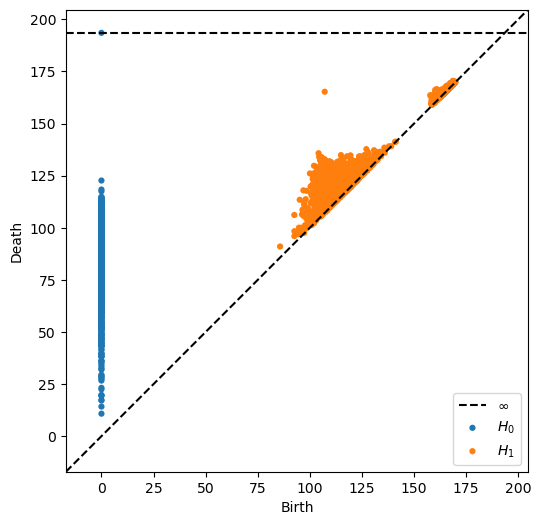

In [236]:
#Z3
output = pipeline(image_function=mult13coef, num_pixels=50, window_size= 30, n_isos=2000, x_translate=1000, y_translate=1000, maxdim=1, coeff=3)
plot_dgms(output)

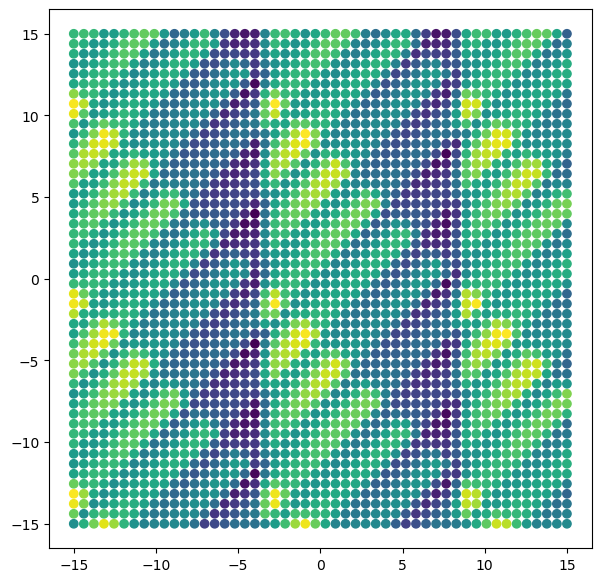

In [235]:
view_window_continuous(mult13coef,50,30)

**it thinks its C4?**

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


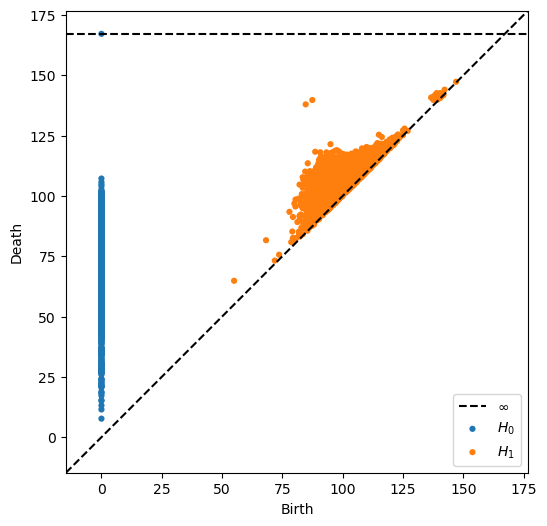

In [253]:
#Z2
output = pipeline(image_function=mult13coef, num_pixels=50, window_size= 10, n_isos=2000, x_translate=1000, y_translate=1000, maxdim=1, coeff=2)
plot_dgms(output)

In [254]:
persistent_H1_intervals(output)

[53.282684326171875,
 52.317543029785156,
 29.71466064453125,
 28.01172637939453,
 27.389984130859375,
 26.512237548828125,
 25.65583038330078,
 25.357933044433594,
 24.974037170410156,
 24.791419982910156,
 24.726776123046875,
 24.564407348632812,
 24.353797912597656,
 24.225860595703125,
 23.9622802734375,
 23.94554901123047,
 23.879249572753906,
 23.70940399169922,
 23.40483856201172,
 23.401878356933594,
 23.389015197753906,
 23.335357666015625,
 23.111907958984375,
 23.082229614257812,
 23.02948760986328,
 22.971328735351562,
 22.919029235839844,
 22.89665985107422,
 22.887344360351562,
 22.88329315185547,
 22.76513671875,
 22.616912841796875,
 22.589874267578125,
 22.570327758789062,
 22.414215087890625,
 22.35456085205078,
 22.336891174316406,
 22.25908660888672,
 22.23089599609375,
 22.18413543701172,
 22.173667907714844,
 22.16429901123047,
 22.098770141601562,
 21.93719482421875,
 21.884864807128906,
 21.873886108398438,
 21.84880828857422,
 21.844337463378906,
 21.6257400512

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


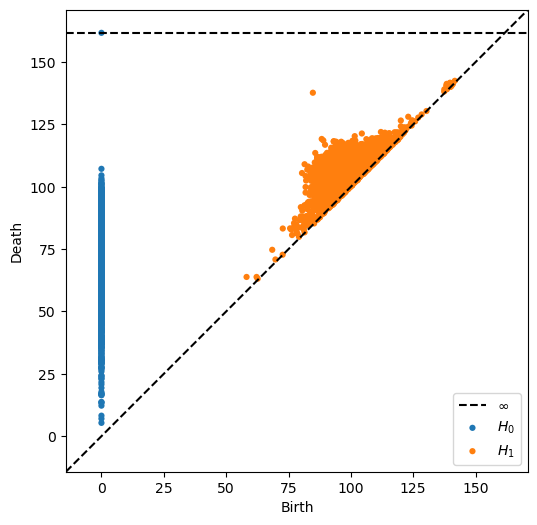

In [257]:
#Z3
output = pipeline(image_function=mult13coef, num_pixels=50, window_size= 10, n_isos=2000, x_translate=1000, y_translate=1000, maxdim=1, coeff=3)
plot_dgms(output)

In [258]:
persistent_H1_intervals(output)

[52.935264587402344,
 30.8499755859375,
 29.60395050048828,
 27.826095581054688,
 27.58434295654297,
 27.18767547607422,
 25.447486877441406,
 25.212364196777344,
 25.140480041503906,
 25.09015655517578,
 24.99645233154297,
 24.799896240234375,
 24.729156494140625,
 24.46038055419922,
 24.344451904296875,
 24.2275390625,
 24.058746337890625,
 23.839599609375,
 23.80573272705078,
 23.624832153320312,
 23.601905822753906,
 23.530296325683594,
 23.15782928466797,
 23.051986694335938,
 22.991416931152344,
 22.976226806640625,
 22.742759704589844,
 22.709152221679688,
 22.591629028320312,
 22.51805877685547,
 22.496238708496094,
 22.491058349609375,
 22.403297424316406,
 22.33405303955078,
 22.286239624023438,
 22.270645141601562,
 22.25775909423828,
 22.213768005371094,
 22.180885314941406,
 22.12250518798828,
 22.065872192382812,
 22.012718200683594,
 21.964706420898438,
 21.913299560546875,
 21.893783569335938,
 21.819732666015625,
 21.8150634765625,
 21.793128967285156,
 21.713256835937

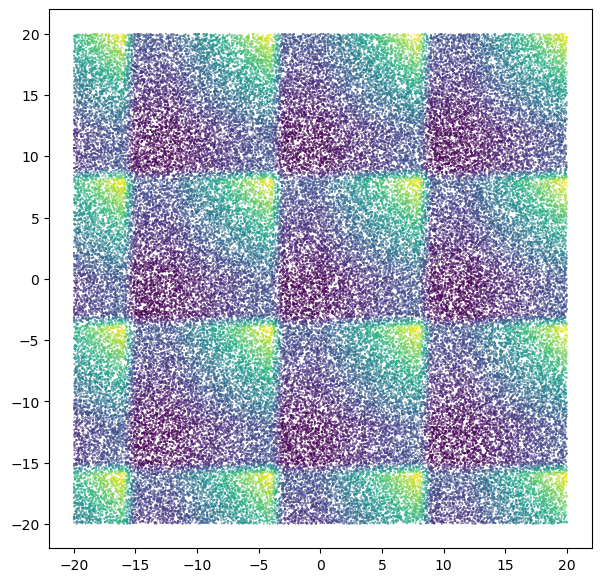

In [16]:
def mult33(x,y):
    return angelica3(x) * angelica3(y)
graph_continuous(mult33,20,20)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


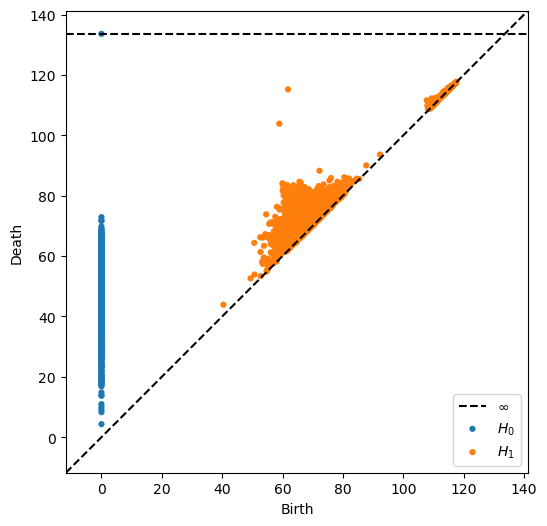

In [262]:
#Z2
output = pipeline(image_function=mult33, num_pixels=50, window_size= 50, n_isos=2000, x_translate=1000, y_translate=1000, maxdim=1, coeff=2)
plot_dgms(output)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


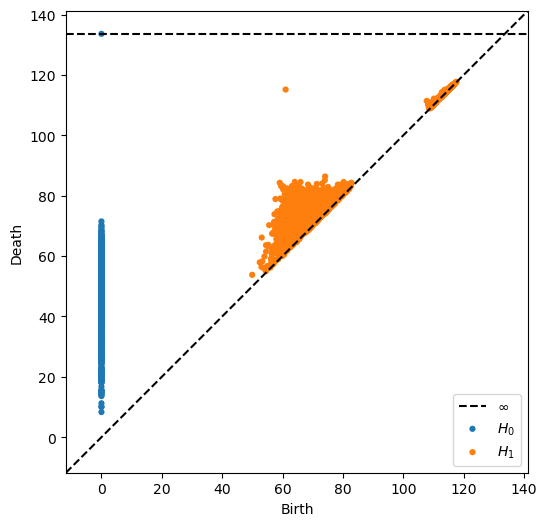

In [263]:
#Z3
output = pipeline(image_function=mult33coef, num_pixels=50, window_size= 50, n_isos=2000, x_translate=1000, y_translate=1000, maxdim=1, coeff=3)
plot_dgms(output)

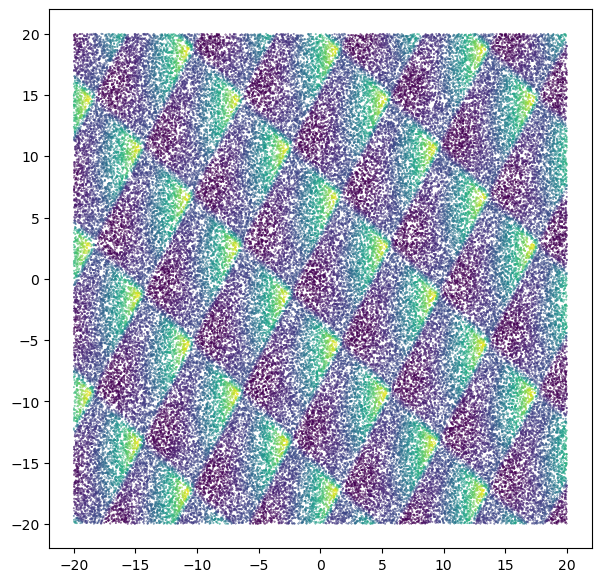

In [6]:
def mult33(x,y):
    return angelica3(x+y) * angelica3(2*x-y)
graph_continuous(mult33,20,20)

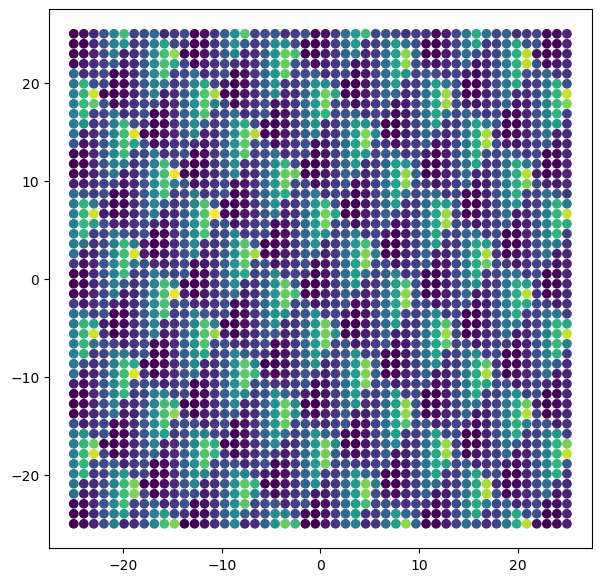

In [18]:
view_window_continuous(mult33, 50, 50)

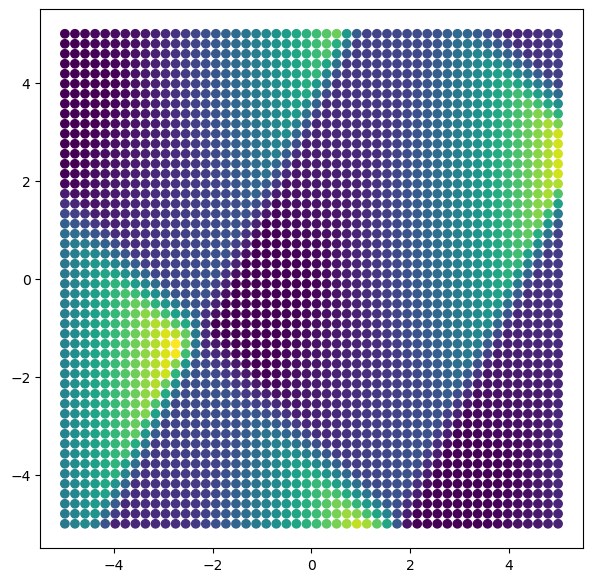

In [19]:
view_window_continuous(mult33, 50, 10)

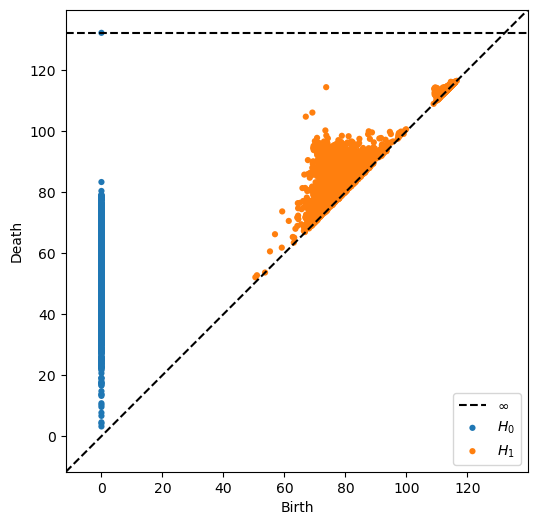

In [267]:
#Z2
output = pipeline(image_function=mult33coef, num_pixels=50, window_size= 50, n_isos=3000, x_translate=1000, y_translate=1000, maxdim=1, coeff=2)
plot_dgms(output)

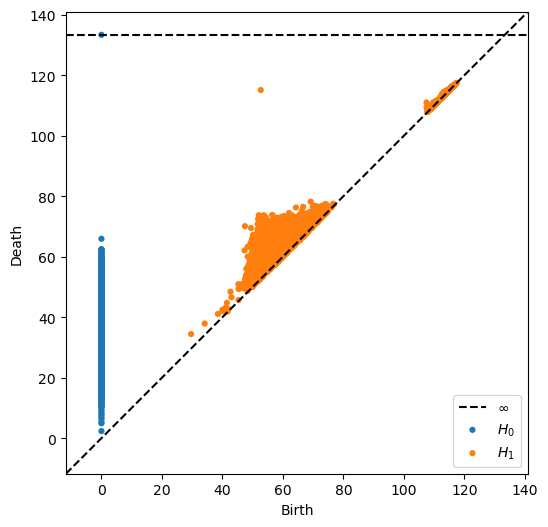

In [21]:
#Z3
output = pipeline(image_function=mult33coef, num_pixels=50, window_size= 50, n_isos=5000, x_translate=1000, y_translate=1000, maxdim=1, coeff=3)
plot_dgms(output)

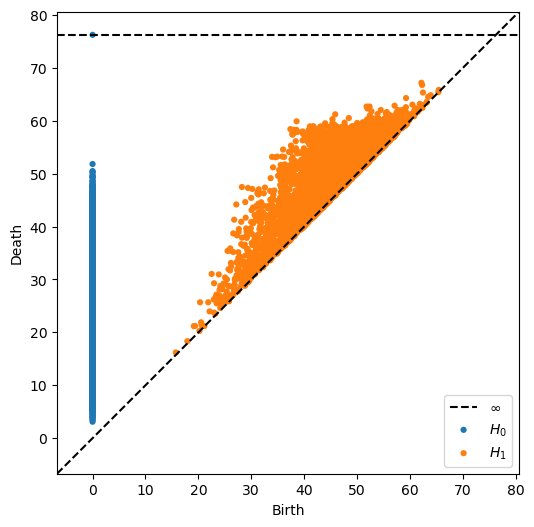

In [22]:
#Z3
output = pipeline(image_function=mult33coef, num_pixels=50, window_size= 10, n_isos=5000, x_translate=1000, y_translate=1000, maxdim=1, coeff=3)
plot_dgms(output)

**Looking at just translations**

In [1]:
def generate_isom_trans(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(np.zeros(2*n_isos)) 

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv


def pipeline_trans(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom_trans(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

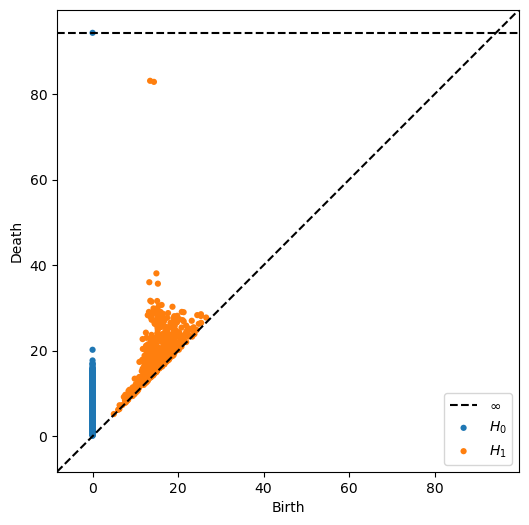

In [9]:
output = pipeline_trans(image_function = mult33, num_pixels = 40 , window_size = 50, n_isos = 2000, x_translate= 100 , y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

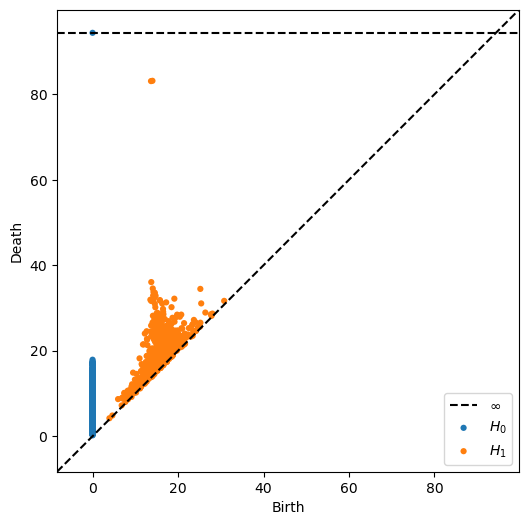

In [11]:
output = pipeline_trans(image_function = mult33, num_pixels = 40 , window_size = 50, n_isos = 2000, x_translate= 100 , y_translate=100, maxdim=1, coeff=3)
plot_dgms(output)